EXPLAIN STUFF HERE 

# Code Examples:

## Running only one file which is part of a whole survey

### Adding Hyperparameters

The main hyperparameters needed to run a single line are:

    * DATA_DIR: a data directory/folder
    * FILE: a csv holding the data with a heading of "Long","Lat","Mag_nT"
    * INEPSG: the epsg code which your data starts in
    * OUTEPSG: the UTM epsg code which you want to transform your data into. Most of the code behind the scenes uses Easting and Northing values for data manipulation and plotting

In [1]:
from pathlib import Path # Path library imported to handle data importation

DATA_DIR = '/home/robert/Codes/pycodes/geomag/' # directory for the file(s)
FILE = Path(f'{DATA_DIR}/20191018_224714.txt') # file to work on
INEPSG = '4326' #epsg code your data starts in 
OUTEPSG = '32611' # epsg code you want to transform your data into 

### Creating a pydantic data class to validate that hyperparameters are input in the correct format
 Creating a pydantic based data class to recieve hyperparameters and perform validation on the parameters
 **example: if you type '4326A' for the INEPSG it will give an error or if FILE does not exist**

In [2]:
from source.geomag import GeoMag
from pprint import pprint

geomag = GeoMag(
    filepath=FILE,
    input_epsg=INEPSG,
    output_epsg=OUTEPSG)

### Manipulation of a single data file

Instantiating a MagApp class which is the interface to library code which performs the data manipulation

In [27]:
from source.app import MagApp

app = MagApp(parameters=geomag)

#printing the applications attributes from ingesting the dataclass
print("App Parameters: ",app.parameters,"\n")
print("App Data:\n", app.data,"\n")
print("App Separate Lines:\n", app.lines,"\n")

App Parameters:  filepath=PosixPath('/home/robert/Codes/pycodes/geomag/20191018_224714.txt') input_epsg='4326' output_epsg='32611' dates=None elevation='0' 

App Data:
             Long        Lat   Mag_nT
0    -116.613926  36.767586  48336.2
1    -116.613924  36.767568  48333.5
2    -116.613921  36.767550  48330.5
3    -116.613919  36.767531  48329.4
4    -116.613916  36.767511  48329.5
...          ...        ...      ...
2269 -116.609835  36.764904  48112.9
2270 -116.609834  36.764886  48117.9
2271 -116.609833  36.764868  48121.6
2272 -116.609832  36.764852  48122.0
2273 -116.609831  36.764838  48124.7

[2274 rows x 3 columns] 

App Separate Lines:
 None 



### Instantiating a "DataPlotter" class

The DataPlotter class I have created holds all of the functions I would like to use for this data and takes as the primary argument a MagApp with some optional variables based on the specific instance 

In [28]:
from source.plot_data import DataPlotter

plotter = DataPlotter()


simple_plot takes as an argument of a MagApp and will automatically plot the geographic coordinates of the MagApp

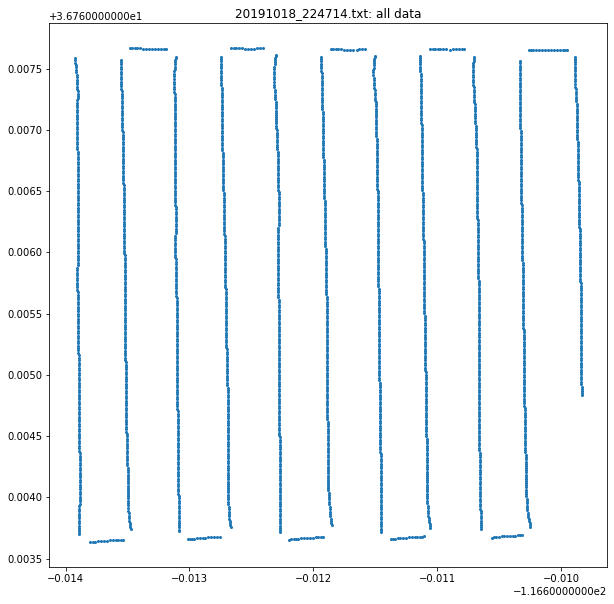

In [30]:
plotter.simple_plot(app)

### Transforming your data to UTM

transform_coords calls pyroj and the epsg codes given as hyperparameters and adds an Easting and Northing column"

In [31]:
# transform your data coordindates using the epsg codes given above, adds two columns
app.transform_coords()

# printing the new data 
app.data

,Long,Lat,Mag_nT,Easting,Northing
0,-116.613926,36.767586,48336.2,534455.645360,4.069160e+06
1,-116.613924,36.767568,48333.5,534455.865252,4.069158e+06
2,-116.613921,36.767550,48330.5,534456.110874,4.069156e+06
3,-116.613919,36.767531,48329.4,534456.352891,4.069154e+06
4,-116.613916,36.767511,48329.5,534456.571845,4.069152e+06
...,...,...,...,...,...
2269,-116.609835,36.764904,48112.9,534822.050031,4.068864e+06
2270,-116.609834,36.764886,48117.9,534822.098480,4.068862e+06
2271,-116.609833,36.764868,48121.6,534822.167728,4.068860e+06
2272,-116.609832,36.764852,48122.0,534822.264860,4.068858e+06


### Cutting out data points to clean data

cut_data will determine the overall heading of the file given and cut out the data points which do not match that overall heading. It takes an optional argument of buffer which gives a n degree buffer to make the cutting less strict, default is 5 degrees

**example: if the data is of a predominatly N-S heading points with an E-W heading will be cut out**

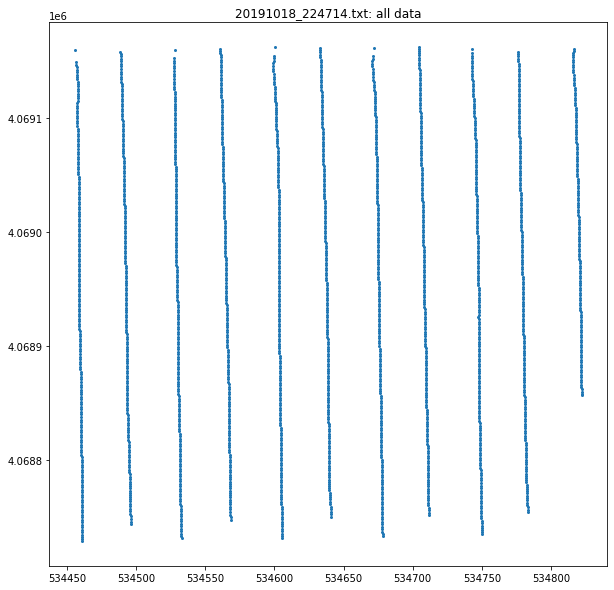

In [32]:
app.cut_data(buffer=5) # A buffer of 5 degrees is given to make the cutting less strict

plotter.simple_plot(app) # plotting the new cut data to show the result 

### Separating data into single lines

Now that the data is cleaned into points with the same heading we can separate the lines. 
To do this you need to call separate_data and pass in a class which tells the code what type of separation to perform.

The DistanceSeparator class holds all the functions needed to separate the dataframe into single lines based on points that are closest to each other

It then returns a dictionary which holds a dataframe for each line. The new dataframes have the calculated heading/direction for each point and thier distance to the next point


In [38]:
from source.separate_data import DistanceSperator

# separate lines takes as an argument a separation strategry which is a 
#class built to separate the data in various ways,for this file the points will be separated by their closeness

app.separate_lines(separation_strategy=DistanceSperator())

# this returns a dictionary of dataframes to the app.lines atrribute
app.lines

Patch data was updated


{'line 1':            Long        Lat   Mag_nT        Easting      Northing     Heading  \
 1   -116.613914  36.767491  48329.9  534456.763253  4.069149e+06  175.038754   
 2   -116.613913  36.767471  48330.3  534456.932212  4.069147e+06  175.648807   
 3   -116.613911  36.767451  48330.6  534457.083047  4.069145e+06  176.104957   
 4   -116.613910  36.767431  48330.8  534457.222699  4.069143e+06  176.368687   
 5   -116.613908  36.767412  48330.8  534457.352987  4.069141e+06  176.577400   
 ..          ...        ...      ...            ...           ...         ...   
 189 -116.613890  36.763768  48382.7  534460.624915  4.068736e+06  179.925444   
 190 -116.613890  36.763749  48381.5  534460.624725  4.068734e+06  180.005082   
 191 -116.613890  36.763730  48380.8  534460.627077  4.068732e+06  179.933779   
 192 -116.613890  36.763713  48380.9  534460.642346  4.068730e+06  179.543370   
 193 -116.613890  36.763697  48381.7  534460.684918  4.068729e+06  178.623244   
 
     Dir       D

We can now use simple_plot with the the optional variable lines set to true to geographically plot each line individually

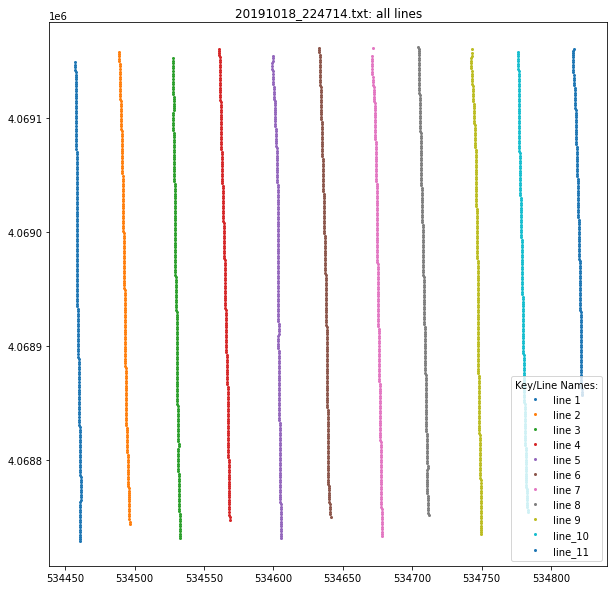

In [39]:
# we can show and visualize how the data was separated.
plotter.simple_plot(app,lines=True)# lines = True tells the code to plot the separated lines not the whole data

### Further visualization of the separated lines

plotting a single magnetic profile of line 5

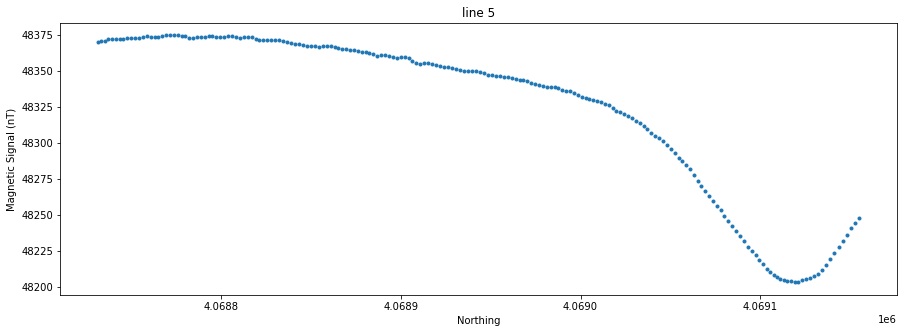

In [45]:
# plot a single line magnetic profile by giving a key/line name 
plotter.plot_mag_profile(app,key_name='line 5')

plotting all the magnetic profiles sep

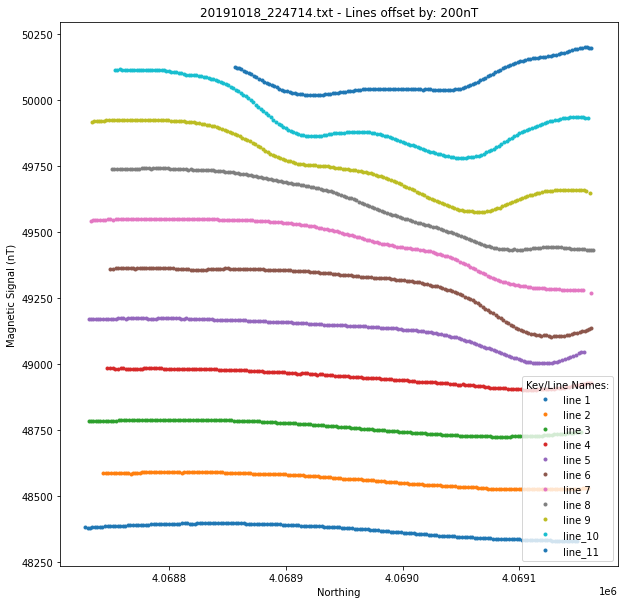

In [46]:
plotter.plot_offset_profile(app,offset=200) # default offset is 150 nt

## Running multiple files from the same survey

In [ ]:
# only need a data directory 

DATA_DIR = '/home/robert/DataStorage/Amargosa/rawdata/patches/' # directory for the file(s)
INEPSG = '4326' #epsg code your data starts in 
OUTEPSG = '32611' # epsg code you want to transform your data into 
DATES = ['2019-10-18', '2019-10-17',  '2019-10-19', '2019-10-21'] # dates must be in year-month-day format

In [ ]:
# importing a helper function to make running multiple files easier
from source.helper_functions import files_to_dict,merge_object_data

# this functions takes each filepath to a file in the given directory and returns it as a dictionary
all_files = files_to_dict(DATA_DIR) 

object_dict={} # creating an empty data dictionary to hold MagApp objects

for key,FILE in all_files.items():

        # initializing and validating input parameters
        geomag = GeoMag(
            filepath=FILE,
            input_epsg=INEPSG,
            output_epsg=OUTEPSG,
            dates=DATES,
        )

        # create the application
        app = MagApp(parameters = geomag)

        # transforming lat long to utm
        app.transform_coords()

        # cleaning data based on heading
        app.cut_data(buffer=5)

        # putting each app data into the object dict  
        object_dict[key] = app.data

# this function takes each dataframe created from the respective files and 
# turns it into one single dataframe for the entire sruvey
merged_data = merge_object_data(object_dict)

#instanciating a new app where the data attribute equals the merged data
app = MagApp(parameters = geomag, merged_patches = merged_data)
app.data

In [ ]:
from numpy import unique

#cutting the dumby value 999 that has to be added as the heading of the starting point so the list length matches
df = app.data[app.data.Heading < 999]
df.hist(column="Heading",figsize=(10,10))

#using numpy to see the exact number of EW vs NS points
unique(df["Dir"],return_counts=True)

### Plot the entire field map using cartopy

In [ ]:
# function takes the app, a name for the data, a scale bar length and number of segments for the bar
# it will also prompt an input if you want to save the data
plotter.cartoplot(app,data_name="Little Cones Survey",length=500,segments=2)

### Clean up the magnetic signal before plotting 

In [ ]:
#this function will take the input dates as well as location values in the data attribute and 
#call the NOAA IGRF api which will give the total field for those dates/loctation and subtract it from 
# the mag column

app.subtract_total_field() 

#if you already know the total field value it can be input by app.subtract_total_field(value=50000) 
#which will override the api call

# this function will find the mean of your magnetic signal column and subtract it from each point
app.subtract_mean()


# quickly view the resulting magnetic values
app.data.boxplot(column="Mag_nT",figsize=(10,10))

In [ ]:
from source.stats import Stats
statter = Stats()
      
statter.get_stats(app,bins=93)

### plotting a heatmap using pygmt

In [ ]:
# this function takes the app.data attribute, a filename for the image, and a spacing for the heatmap grid
# in the background this creates a netcdf for gridding and a cpt for coloring 

image_name = 'heatmap.png'
# grid_spacing = 25
# plotter.GMTHeatmap(app.data,image_name,grid_spacing)

In [ ]:
# showing the resultant image
from IPython.display import Image
Image(filename=image_name) 

## Extract a line and prepare for forward modeling

In [ ]:
from source.separate_data import SingleSeparator

#To separate a single line(s) first a data frame must be defined with each lines start and end point defined
# more than one line can be defined at a time
key_name='line 1'
line_params = {
    # Line name : [(start coordinates), (end coordinates)]
    key_name: [(535813.2518, 4070414.612),(535843.0884,4069300.961)],
    }

# in contrast to the last time separate_lines was used this time it is called again but with a different 
# separation strategy which does a single line at a time and needs the points defined 
app.separate_lines(SingleSeparator(),line_params)

plotter.simple_plot(app,lines=True)
plotter.plot_mag_profile(app,key_name=key_name)

In [ ]:
# to properly run this line in a plouff model the magnetic values need to be centered around 0
from source.correct_data import NorthSouthDetrend

# like other functions subtract_line takes a strategy defined by a class the two implimented are NorthSouthDetrend
# or EastWestDetrend depending on the direction of your line

# the function itself calculates a striaght line from the endpoints of the given line and subtracts it out returning
# a magnetic line about 0 
app.subtract_line(NorthSouthDetrend(),key_name)

plotter.plot_mag_profile(app,key_name=key_name)

## Forward Modeling

### Model Hyperparameters

In [ ]:
SHAPE_DIR = '/home/robert/Codes/pycodes/geomag/shapes/' # directory where the shapefile is stored for modeling
#shapes and tops are list incase multiple shapes with different top bounds are used
SHAPES = [Path(f'{SHAPE_DIR}/shape5.utm')]
TOPS = [45]
BOTTOM= 50
INC= -67
DEC= 177
INT= 1
LINE = app.lines['line 1'] # line to be modeled 

In [ ]:
# importing a data class which takes parameters and has method which model a given magnetic line
from source.model_data import PloufModel

# plouff model pydantic data class which will validate all hyperparameters
model = PloufModel(
    line = LINE,
    shapes= SHAPES,
    top_bound= TOPS,
    bottom_bound= BOTTOM,
    inclination= INC,
    declination= DEC,
    intensity= INT
)
model.Parameters

In [ ]:
#run the model
model.run_plouf()

# print results
model.results['model 1']

In [ ]:
# plot the model results with the observed line
plotter.plot_model(app,model,key_name)
plotter.plot_residuals(model)

In [ ]:
rmse,norm_rmse = statter.rmse(app,model)
        
print("RMSE: ",rmse)
print("Normalised RMSE: ", norm_rmse)

In [ ]:
statter.ks_test(app,model)
statter.chi_squared(app,model)